<a href="https://colab.research.google.com/github/takatakamanbou/ML/blob/2023/ex05notebookA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML ex05notebookA

<img width=72 src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/ML-logo.png"> [この授業のウェブページ](https://www-tlab.math.ryukoku.ac.jp/wiki/?ML/2023)


----
## ロジスティック回帰＋勾配法によるパラメータの最適化 (3)
----




----
### 準備


以下，コードセルを上から順に実行してながら読んでいってね．

In [ ]:
# 準備あれこれ
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc  # アニメーションのため
import pandas as pd
import seaborn
seaborn.set()

----
### 最急降下法によるロジスティック回帰モデルの学習（2クラス識別の場合）

2クラス識別のロジスティック回帰モデルで，パラメータを最急降下法で最適化する手順を考えましょう．

2クラス識別のロジスティック回帰の問題設定は以下の通りでした．


**［ロジスティック回帰の問題設定（2クラスの場合）］**

$D$次元のデータを二つのクラスに識別するモデルを学習させる．学習データは $N$ 個あり，次のように与えられる．

$$
(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2),\ldots , (\mathbf{x}_N, y_N)
$$

ただし，$\mathbf{x}_n \in {\cal R}^{D}$ はモデルへの入力であり，$y_n \in \{0, 1\}$ はこのデータの所属クラスの正解を表す値である（$n=1,2,\ldots,N$）．

学習モデルは次式で定める．
$$
f(\mathbf{x}) = \frac{1}{\displaystyle 1+\exp{\left( - \left( w_0 + \sum_{d=1}^{D}w_dx_d \right) \right)}} \qquad (1)
$$
このモデルのパラメータは $w_0, w_1, \ldots, w_D$ の $(D+1)$ 個ある．

このとき，モデルの出力と正解の値との間の「遠さ」を，次式の交差エントロピーで定義する．
$$
\begin{aligned}
H &= -\sum_{n=1}^{N} \left( y_n\log{f(\mathbf{x}_n})+(1-y_n)\log{\left( 1-f(\mathbf{x}_n)\right)} \right) \qquad (2)
\end{aligned}
$$
この $H$ の値がなるべく小さくなるようにパラメータ $w_0, w_1, \ldots, w_D$ を求めたい．

パラメータをならべたベクトルを $\mathbf{w} = (w_0, w_1, \ldots, w_D)$ と表すことにして，$H$ を最小にする $\mathbf{w}$ を求める最急降下法の手続きを導出します．

#### 勾配の計算

最急降下法では $H$ の $\mathbf{w}$ に関する勾配
$$
\nabla{H} = \left( \frac{\partial H}{\partial w_0}, \frac{\partial H}{\partial w_1}, \ldots, \frac{\partial H}{\partial w_D}\right)
$$
が必要ですので，$\frac{\partial H}{\partial w_d}$ ($d=0,1,\ldots,D$) を求めましょう．

ここで，$\hat{y}_n = f(\mathbf{x}_n)$ および
$$
\ell_n = y_n\log \hat{y}_n + (1-y_n)\log(1-\hat{y}_n) \qquad (3)
$$
とおくことにします．このとき，
$$
\frac{\partial H}{\partial w_d} = -\sum_{n=1}^{N}\frac{\partial \ell_n}{\partial w_d} \qquad (4)
$$
です．

また，準備として，シグモイド関数の微分を計算しておきます．
シグモイド関数は
$$
\sigma(s) = \frac{1}{1+\exp{(-s)}} \qquad (5)
$$
というものでした．その微分は
$$
\begin{aligned}
\frac{d\sigma(s)}{ds} &= \frac{\exp{(-s)}}{(1+\exp{(-s)})^2} = \frac{1}{1+\exp{(-s)}}\cdot\frac{\exp{(-s)}}{1+\exp{(-s)}}\\
&= \sigma(s) \cdot (1-\sigma(s)) \qquad(6)
\end{aligned}
$$
となり，自分自身の値を使って表すことができます．

それでは，$\frac{\partial \ell_n}{\partial w_d}$ を求めましょう．式(3)より，
$$
\frac{\partial \ell_n}{\partial w_d} = y_n \frac{1}{\hat{y}_n}\frac{\partial \hat{y}_n}{\partial w_d} + (1-y_n)\frac{1}{1-\hat{y}_n}\left(-\frac{\partial \hat{y}_n}{\partial w_d}\right) 
$$
です．ここで，
$$
\begin{aligned}
\frac{\partial \hat{y}}{\partial w_d} &= \frac{\partial}{\partial w_d} \sigma\left( w_0 + \sum_{d=1}^{D}w_dx_{n,d} \right) = \hat{y}_n(1-\hat{y}_n)\frac{\partial}{\partial w_d}\left( w_0 + \sum_{d=1}^{D}w_dx_{n,d} \right) \\
&= \hat{y}_n(1-\hat{y}_n)x_{n,d}
\end{aligned}
$$
となることから，

$$
\frac{\partial \ell_n}{\partial w_d} = (y_n - \hat{y}_n)x_{n,d} =  \left(y_n-f(\mathbf{x}_n)\right)x_{n,d} \qquad (n = 1, 2, \ldots, N, d = 0, 1, \ldots, D)
$$

が得られます．ただし，$x_{n,0} \equiv 1$ としました．

以上より，勾配ベクトルの要素は
$$
\begin{aligned}
\frac{\partial H}{\partial w_d} &= -\sum_{n=1}^{N}\frac{\partial \ell_n}{\partial w_d} = -\sum_{n}^{N}(y_n - f(\mathbf{x}_n))x_{n,d}\qquad (d = 0, 1, \ldots, D) \qquad (7)
\end{aligned}
$$
となります．ベクトルの形にまとめて書くと，
$$
\nabla{H} =  -\sum_{n}^{N}(y_n - f(\mathbf{x}_n)) \mathbf{x}_n \qquad (8)$$
です．

#### パラメータ更新式の導出

勾配の式が求まりました．これを用いて最急降下法によるパラメータ更新式を求めると，次のようになります．
$$
\begin{aligned}
\mathbf{w}^{\rm new} &= \mathbf{w} - \eta \nabla H \\
&=\mathbf{w} + \eta\sum_{n}^{N}(y_n - f(\mathbf{x}_n)) \mathbf{x}_n \qquad (9)
\end{aligned}
$$
$\eta$ は正の定数（学習係数）です．

交差エントロピーやシグモイドに $\log$ や $\exp$ が入っていたわりには，パラメータを更新するための式はシンプルな形になります．
$f(\mathbf{x}_n)$ はデータ $\mathbf{x}_n$ をモデルに入力して得られる出力（$0 < f(\mathbf{x}_n) < 1$），$y_n$ はその正解の値（$y_n \in\{0,1\}$）でした．
この式を見ると，両者の差 $y_n - f(\mathbf{x}_n)$ と入力の値との積に応じてパラメータを更新することになっています．

----
### 例: 2次元2クラスのデータのロジスティック回帰

最急降下法のパラメータ更新式が求まりましたので，ロジスティック回帰モデルの学習手順をプログラムとして書くことができます．
以前使ったのと同じ2次元2クラスのデータで実際にロジスティック回帰の学習を行ってみましょう．

#### データの準備

In [ ]:
## 2次元正規分布で2クラスのデータを生成する関数

def getData(seed = None):

    if seed != None:
        np.random.seed( seed )

    # two 2-D spherical Gaussians
    X0 = 1.0*np.random.randn(200, 2) + [3.0, 3.0]
    X1 = 1.0*np.random.randn(200, 2) + [7.0, 6.0]
    X  = np.vstack((X0, X1))
    lab0 = np.zeros(X0.shape[0], dtype=int)
    lab1 = np.zeros(X1.shape[0], dtype=int) + 1
    label = np.hstack((lab0, lab1))
 
    return X, label

データ数 N = 400, 次元数 D = 2


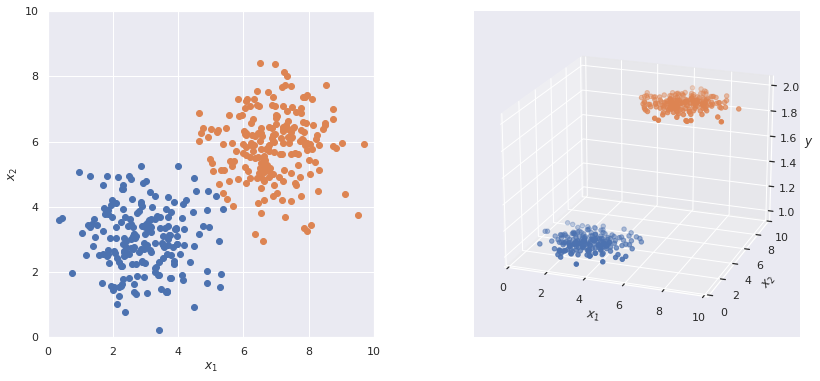

In [ ]:
# データの準備
X, lab = getData(seed=0)
N, D = X.shape
Yt = lab
X = np.vstack((np.ones(N), X.T)).T
print(f'データ数 N = {N}, 次元数 D = {D}')

fig = plt.figure(facecolor='white', figsize=(14, 6))

# 左の2次元散布図
ax0 = fig.add_subplot(121)
ax0.set_xlim(0, 10)
ax0.set_ylim(0, 10)
ax0.set_aspect('equal')
ax0.scatter(X[Yt == 0, 1], X[Yt == 0, 2]) # blue
ax0.scatter(X[Yt == 1, 1], X[Yt == 1, 2]) # orange
ax0.set_xlabel('$x_1$')
ax0.set_ylabel('$x_2$')

# 右の3次元散布図
elevation = 20
azimuth = -70
ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(X[Yt==0, 1], X[Yt==0, 2], 1) # blue
ax1.scatter(X[Yt==1, 1], X[Yt==1, 2], 2) # orange
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.view_init(elevation, azimuth)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$y$')

plt.show()

#### 学習


次のセルは，学習のための関数の定義です．

In [ ]:
# モデル出力の計算
def model(X, w):
    return 1.0 / (1.0 + np.exp(-(X @ w)))

# 交差エントロピーと正解数
def score(Y, Yt):
    ce = -np.sum(Yt*np.log(Y)+(1.0-Yt)*np.log(1.0-Y)) # 交差エントロピー
    count = np.sum((Y >= 0.5)*Yt) + np.sum((Y < 0.5)*(1 - Yt)) # 正解数
    return ce, count

# 勾配の計算
def grad(X, Y, Yt):
    return (Y - Yt) @ X

次のセルを実行すると，上記の2次元2クラスデータのロジスティック回帰モデルの学習を行います．

In [ ]:
# パラメータの初期化
w = (np.random.random(D+1) - 0.5) * 0.2 # [-0.1, 0.1) の一様乱数

# 学習係数と学習繰り返し回数
eta = 0.2/N
nitr = 1000

# 学習
for i in range(nitr+1):
    Y = model(X, w)     # モデル出力の計算
    ce, count = score(Y, Yt) # 交差エントロピーと正解数の計算
    dw = grad(X, Y, Yt) # 勾配の計算
    w -= eta * dw       # パラメータの更新
    if (i < 100 and i % 10 == 0) or (i % 100 == 0):
        print(f'{i}  {ce:.4f}  {float(count)/N}')

0  288.5504  0.4675
10  237.4252  0.7625
20  214.2993  0.79
30  196.9380  0.81
40  183.9557  0.8225
50  173.1760  0.835
60  163.6244  0.855
70  155.0580  0.88
80  147.3389  0.895
90  140.3574  0.9225
100  134.0217  0.935
200  93.3213  0.9625
300  73.0434  0.9775
400  60.9858  0.98
500  52.9735  0.985
600  47.2410  0.9875
700  42.9200  0.99
800  39.5351  0.99
900  36.8038  0.99
1000  34.5479  0.99


出力される数値は，左から順に「学習繰り返し回数」，「（学習データに対する）交差エントロピー」，「（同）識別率」です．最急降下法のステップを繰り返すごとに，交差エントロピーの値が減少していること，それに連れて識別率は上昇していることが分かります．

学習（アニメーション版）

以下のセルを実行すると，上記と同様の学習の過程をアニメーションに描きます．

In [ ]:
# パラメータの初期化
w = (np.random.random(D+1) - 0.5) * 0.2 # [-0.1, 0.1) の一様乱数

# 学習係数と学習繰り返し回数
eta = 0.2/N
nitr = 1000

fig = plt.figure(facecolor='white', figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
elevation = 20
azimuth = -70
ax1.view_init(elevation, azimuth)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_zlim(0, 1)
ax1.scatter(X[Yt==0, 1], X[Yt==0, 2], 0)
ax1.scatter(X[Yt==1, 1], X[Yt==1, 2], 1)
#fig.show()

ax2.set_xlim(0, nitr)
ax2.set_ylim(0, 300)

aList = []
xx, yy = np.meshgrid(np.linspace(0, 10, num=16), np.linspace(0, 10, num=16))
xxr, yyr = xx.ravel(), yy.ravel()
XX = np.vstack((np.ones(xxr.shape[0]), xxr, yyr)).T

iList = []
ceList = []

for i in range(nitr+1):

    Y = model(X, w)     # モデル出力の計算
    ce, count = score(Y, Yt) # 交差エントロピーと正解数の計算
    dw = grad(X, Y, Yt) # 勾配の計算
    w -= eta * dw       # パラメータの更新

    if (i < 100 and i % 10 == 0) or i % 100 == 0:
        iList.append(i)
        ceList.append(ce)
        ZZ = model(XX, w)
        zz = ZZ.reshape(xx.shape)
        a1 = ax1.plot_wireframe(xx, yy, zz, color='green')
        a2 = ax2.plot(iList, ceList, color='blue', marker='.')
        rr = count/N*100
        s = f'H = {ce:.3f}\nrate = {rr:.1f}%'
        a3 = ax2.text(500, 240, s, size=20)
        aList.append([a1]+a2 + [a3])

anim = animation.ArtistAnimation(fig, aList, interval=300)
rc('animation', html='jshtml')
plt.close()
anim


上記のセルは実行するたびにパラメータが異なる乱数で初期化されます．何度かセルを実行して，どんな違いが出るか確認してみましょう．

----
### 一般のロジスティック回帰モデルとその学習


ここまではクラス数が2の場合限定でロジスティック回帰の話をしてきました．ここからは，クラス数が3以上の問題でも使える一般のロジスティック回帰モデルとその学習について説明します．
以下，クラス数を文字 $K$ で表します．

#### 一般のロジスティック回帰モデル


**［ロジスティック回帰の問題設定（$K$クラスの場合）］**

$D$次元のデータを$K$個のクラスに識別するモデルを学習させる．学習データは $N$ 個あり，次のように与えられる．

$$
(\mathbf{x}_1, \mathbf{y}_1), (\mathbf{x}_2, \mathbf{y}_2),\ldots , (\mathbf{x}_N, \mathbf{y}_N)
$$

ただし，$\mathbf{x}_n \in {\cal R}^{D}$ はモデルへの入力である．また，$\mathbf{y}_n \in \{0, 1\}^{K}$ （$0$か$1$のみを要素にもつ$K$次元ベクトル）はこのデータの所属クラスの正解を表す値である（$n=1,2,\ldots,N$）．

$\mathbf{y}_n = (y_{n,1}, y_{n,2}, \ldots, y_{n,K})$ の要素 $y_{n,k}$ は，$n$番目の学習データが $k$ 番目のクラスに所属するならば $1$，さもなくば $1$ をとる．したがって，$\mathbf{y}_n$ の要素はどれか一つだけが $1$ で他は全て $0$ である．

学習モデルは次式で定める．
$$
\begin{aligned}
\hat{y}_k &= \frac{\exp s_k}{\displaystyle\sum_{k=1}^{K}\exp{s_k}} \qquad (k = 1, 2, \ldots, K) \qquad (10)\\
s_k &= w_{k,0} + \sum_{d=1}^{D}w_{k,d}x_d 
\end{aligned}
$$
このモデルのパラメータは $w_{k,d}$ ($k = 1, 2, \ldots, K, d = 0, 1, \ldots, D$) の $K\times (D+1)$ 個ある．

このとき，モデルの出力と正解の値との間の「遠さ」を，次式の交差エントロピーで定義する．
$$
\begin{aligned}
H &= -\sum_{n=1}^{N} \sum_{k=1}^{K} y_{n,k}\log{\hat{y}_{n,k}}
\end{aligned}
$$
この $H$ の値がなるべく小さくなるようにパラメータ $\{ w_{k,d} \}$ を求めたい．

2クラス識別のロジスティック回帰モデルの出力は1つでしたが，一般化したロジスティック回帰モデルでは，$\hat{y}_1,\hat{y}_2,\ldots, \hat{y}_K$ と $K (=\mbox{クラス数})$ 個あります．大雑把にいうと，2クラス識別のロジスティック回帰モデルを $K$ 個あわせたものになっています．

ただし，2クラス識別では出力の値をシグモイド関数によって計算していたところが，こちらでは式(10)のようになっています．
この式(10)は，**ソフトマックス関数**（**softmax**関数）と呼ばれるものです．
式の形から明らかですが，$0 < \hat{y}_k < 1$ および $\sum_{k=1}^{K}\hat{y}_k = 1$ となる性質があります．

このことから，ある入力データに対するモデル出力 $\hat{y}_1,\hat{y}_2,\ldots, \hat{y}_K$ の値は，そのデータがそれぞれのクラスに所属する確信度合い（確率もどき）を表すと考えることができます．
上記の交差エントロピーを最小化することで，正解クラスに対応する出力が $1$ に近づき，それ以外のクラスに対応する出力が $0$ に近づくようになります．

#### 一般のロジスティック回帰モデルの学習

導出過程は省略しますが，上記の交差エントロピのパラメータに関する勾配は次のようになります．

$$
\frac{\partial H}{\partial w_{k,d}} =  -\sum_{n}^{N}(y_{n,k} - \hat{y}_{n,k}) x_{n,d} \qquad(k = 1, 2, \ldots, K, d = 0, 1, \ldots, D) 
$$

2クラスの場合と同じ構造をしていますね．

以下，最急降下法の手順は2クラスの場合とほとんど同じですので，説明を省略します．

----
### 例: ロジスティック回帰による手書き数字の識別

最短距離法や最近傍法の実験に使ったのと同じ手書き数字のデータを使ってロジスティック回帰モデルの学習の実験をやってみましょう．
このデータがどんなものかという話は，最短距離法や最近傍法について説明した notebook の方に書いています．

まずはデータの準備．

In [ ]:
# 手書き数字データの入手
! wget -nc https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/minimnist.npz
rv = np.load('minimnist.npz')
datL = rv['datL'].astype(float)
labL = rv['labL']
datT = rv['datT'].astype(float)
labT = rv['labT']
print(datL.shape, labL.shape, datT.shape, labT.shape)

K = 10 # クラス数

# 学習データの用意
NL, D = datL.shape # 学習データの数と次元数
XL = np.empty((NL, D+1))
XL[:, 0] = 1.0
XL[:, 1:] = datL/255
YtL = np.zeros((NL, K))
for ik in range(K):
    YtL[labL == ik, ik] = 1.0

# テストデータの用意
NT, _ = datT.shape # テストデータの数
XT = np.empty((NT, D+1))
XT[:, 0] = 1.0
XT[:, 1:] = datT/255
YtT = np.zeros((NT, K))
for ik in range(K):
    YtT[labT == ik, ik] = 1.0

--2023-02-26 02:47:25--  https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/minimnist.npz
Resolving www-tlab.math.ryukoku.ac.jp (www-tlab.math.ryukoku.ac.jp)... 133.83.86.51
Connecting to www-tlab.math.ryukoku.ac.jp (www-tlab.math.ryukoku.ac.jp)|133.83.86.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1705748 (1.6M)
Saving to: ‘minimnist.npz’

minimnist.npz       100%[===================>]   1.63M  1.16MB/s    in 1.4s    

2023-02-26 02:47:28 (1.16 MB/s) - ‘minimnist.npz’ saved [1705748/1705748]

(5000, 784) (5000,) (1000, 784) (1000,)


以下のセルが，上記のデータを 10 クラスに分類するロジスティック回帰の学習のコードです．

In [ ]:
# パラメータの初期化
W = (np.random.random((K, D+1)) - 0.5) * 0.2 # [-0.1, 0.1) の一様乱数

# 学習係数と学習繰り返し回数
eta = 0.01
nitr = 20000

# 学習
for i in range(nitr+1):

    # 学習データの一つをランダムに選択
    n = np.random.randint(NL)
    x, yt = XL[n, :], YtL[n]
    # モデル出力の計算
    exps = np.exp(W @ x)
    y = exps / np.sum(exps)
    # 最急降下法
    dW = (y - yt)[:, np.newaxis] @ x[np.newaxis, :]
    W -= eta * dW

    if (i < 1000 and i % 100 == 0) or (i % 1000 == 0):
        # モデル出力の計算
        exps = np.exp(XL @ W.T)
        Y = exps / np.sum(exps, axis=1)[:, np.newaxis]
        # 交差エントロピー
        ce = -np.sum(YtL * np.log(Y))
        # 正解数
        count = np.sum(labL == np.argmax(Y, axis=1))
        print(f'{i}  {ce:.2f}  {count/NL:.3f}')

print()

# テスト
exps = np.exp(XT @ W.T)
Y = exps / np.sum(exps, axis=1)[:, np.newaxis]
ce = -np.sum(YtT * np.log(Y))
count = np.sum(labT == np.argmax(Y, axis=1))
print(f'テスト: {ce:.2f}  {count/NT:.3f}')

0  11887.34  0.089
100  8990.91  0.439
200  6459.51  0.655
300  5591.80  0.707
400  4764.44  0.777
500  4347.10  0.775
600  4163.19  0.766
700  3848.89  0.796
800  3850.62  0.790
900  3506.57  0.821
1000  3344.34  0.822
2000  2552.65  0.869
3000  2431.15  0.851
4000  2040.35  0.888
5000  2094.00  0.880
6000  1933.28  0.882
7000  1913.36  0.887
8000  1771.65  0.901
9000  1674.30  0.908
10000  1757.66  0.898
11000  1658.43  0.898
12000  1600.20  0.906
13000  1510.16  0.912
14000  1543.39  0.908
15000  1546.60  0.911
16000  1500.09  0.913
17000  1454.90  0.913
18000  1489.24  0.913
19000  1396.51  0.921
20000  1424.64  0.916

テスト: 351.77  0.891


出力される数値は，左から順に「学習繰り返し回数」，「（学習データに対する）交差エントロピー」，「（同）識別率」です．学習を繰り返すごとに交差エントロピーの値が減少していること，それに連れて識別率が上昇していることが分かります．

このコードでは，実行するたびにパラメータの初期値が変化します．何度も実行して結果の違いを観察するとよいでしょう．



### ［発展］確率的勾配降下法

実は，上記の手書き数字の学習のコードでは，最急降下法とは少し異なるパラメータ最適化手法を用いています．ここで用いているのは，**確率的勾配降下法**(stochastic gradient descent, SGD)と呼ばれる手法です．

上記の学習のような問題では，パラメータ最適化のための目的関数は通常，個々の学習データに対して定義された誤差などの和の形で表されます．目的関数を $E(\mathbf{w})$ とおくと，
$$
E(\mathbf{w}) = \sum_{n=1}^{N}e_n(\mathbf{w})
$$
みたいな形をしている，ということです．

このとき，最急降下法のパラメータ更新式は次の通りです．
$$
\mathbf{w}^{\rm new} = \mathbf{w} - \eta \nabla E(\mathbf{w}) 
$$
これに対して，確率的勾配降下法（より正確には，確率的勾配法を用いる最急降下法）では，学習データの中から一つをランダムに選んでは
$$
\mathbf{w}^{\rm new} = \mathbf{w} - \eta \nabla e_n(\mathbf{w}) 
$$
とパラメータ更新することを何回も繰り返します．

最急降下法で用いる勾配は，全ての学習データに関する情報を含んでいます．したがって，学習データたちの目的関数の値を平均的に小さくする方向へパラメータを修正します．
一方，確率的勾配降下法の場合は，一度のパラメータ更新では一つのデータに関する目的関数の値しか小さくしません．他の学習データについては逆に目的関数の値が大きくなってしまうこともありえます．しかし，この操作を何度も繰り返すことで，「確率的に」全体の目的関数の値を最小化することをねらっています．

詳しいことは省きますが，確率的勾配降下法の方が計算時間を短くできたり，使用するメモリ量を節約できたり，より少ない計算量で解に収束することがあるため，実用的にはほとんどこちらが用いられています（注）．

※注: より正確には，一つの学習データだけではなく少数のデータをまとめて勾配を計算する ''Batch SGD'' が用いられます．その方がCPUやGPUが並列計算できてより効率的なので，